<img src="https://github.com/s-simin/Data_Science_Projects/blob/main/02_Singapore_Housing_Data_and_Kaggle_Challenge/images/proj_logo.png?raw=true" style="float: left; margin: 0px 20px 0px 0px; height: 155px;">  

<h1 style="font-family: Segoe UI; color: black; line-height: 1.3;"><strong>Project 2</strong><br>
Singapore Housing Data and Kaggle Challenge</h1>  
<br>
<div style="text-align: right;">
<h4>Authors : Suen Si Min, Ngan Han Kiong, Michael King Sutanto, Irfan Muzafar<br>
Course : DSI-SG-42</h4></div>

---

## Part 4 - Presentation Flow

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import plotly.express as px
import matplotlib.ticker as ticker

from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

import scipy.stats as stats

In [2]:
# Importing data.
housing_train = pd.read_csv('../datasets/train_filtered_1.csv', index_col=0)

In [3]:
housing_train.head()

,resale_price,price_per_sqft,floor_area_sqft,planning_area,lease_commence_date,tranc_year,mid_storey,max_floor_lvl,commercial,market_hawker,...,bus_interchange,bus_stop_nearest_distance,pri_sch_nearest_distance,vacancy,pri_sch_affiliation,sec_sch_nearest_dist,cutoff_point,affiliation,city_distance,flat_type
0,680000.0,701.928238,968.760,Kallang,2006,2016,11,25,0,0,...,0,29.427395,1138.633422,78,1,1138.633422,224,0,4.223704,4 ROOM
1,665000.0,475.230826,1399.320,Bishan,1987,2012,8,9,0,0,...,1,58.207761,415.607357,45,1,447.894399,232,0,7.027402,5 ROOM
2,838000.0,540.639580,1550.016,Bukit Batok,1997,2013,14,16,0,0,...,1,214.747860,498.849039,39,0,180.074558,188,0,12.149659,EXECUTIVE
3,550000.0,496.080066,1108.692,Bishan,1992,2012,3,11,1,0,...,1,43.396521,389.515528,20,1,389.515528,253,1,8.391652,4 ROOM
4,298000.0,333.552717,893.412,Yishun,1987,2017,2,4,0,0,...,0,129.422752,401.200584,74,0,312.025435,208,0,14.753850,4 ROOM


## 1. Introduction

We are Data Scientists for Propertee Guru. We are presenting to executive members of Propertee Guru.

The following features are not available in the current app:
- Distance to school
- Distance to malls
- Price prediction

## 2. Problem Statement

How might we develop a platform for predicting HDB resale flat prices based on preferences, streamlining price comparison process for sellers and buyers, and attracting users to our platform?

## 3. Our Data

The housing data is from March 2012 to April 2021.

### 3.1 Key Attributes of Buying a Flat

<img src="../images/propgurumrt.png" style="float: left; height: 500px">

From our data, these are key attributes that can be found in the current app:

- Planning Area
- Floor Area
- Flat Type
- Floor Level
- Distance to MRT

One more key attribute that the current app lacks is Distance to School.

Zooming in on the planning areas, we can observe the trends in the geospatial data visualization. We use circles to denote the various planning areas. The larger the circle, the higher the average resale price. The more reddish the circle is, the more the number of transactions.

![Geospatial Map](../images/geomap.png)

From here, we can observe that Tanglin is the planning area that has the highest average resale price among all the planning areas. Meanwhile, Changi has the lowest average resale price. Jurong West is the planning area that has the highest number of transactions, while Western Water Catchment has the lowest number of transactions.

### 3.2 Data Dictionary

| No. | Column(s)                                | Description                                                                                                                                      |
|-----|------------------------------------------|----------------------------------------------------------------------------------------------------|
| 1   | flat_type                                | type of the resale flat unit, e.g. 3 ROOM                       
| 2   | lease_commence_date                      | commencement year of the flat unit's 99-year lease               
| 3   | tranc_year                               | year of resale transaction              
| 4   | tranc_month                              | month of resale transaction                                     
| 5   | mid_storey                               | median value of storey_range                                     
| 6   | floor_area_sqft                          | floor area of the resale flat unit in square feet
| 7   | commercial                               | boolean value if resale flat has commercial units in the same block                                            |
| 8   | market_hawker                            | boolean value if resale flat has a market or hawker centre in the same block                                   |
| 9   | multistorey_carpark                      | boolean value if resale flat has a multistorey carpark in the same block                                       |
| 10  | total_dwelling_units                     | total number of residential dwelling units in the resale flat
| 11  | planning_area                            | Government planning area that the flat is located               
| 12  | mall_within_1km                          | number of malls within 1 kilometre  
| 13  | mall_nearest_distance                    | distance (in metres) to the nearest mall    
| 14  | hawker_within_1km                        | number of hawker centres within 1 kilometre
| 15  | hawker_nearest_distance                  | distance (in metres) to the nearest hawker centre
| 16  | mrt_nearest_distance                     | distance (in metres) to the nearest MRT station
| 17  | bus_stop_nearest_distance                | distance (in metres) to the nearest bus stop
| 18  | pri_sch_nearest_distance                 | distance (in metres) to the nearest primary school
| 19  | vacancy                                  | number of vacancies in the nearest primary school
| 20  | pri_sch_affiliation                      | boolean value if the nearest primary school has a secondary school affiliation
| 21  | sec_sch_nearest_dist                     | distance (in metres) to the nearest secondary school
| 22  | cutoff_point                             | PSLE cutoff point of the nearest secondary school
| 23  | max_floor_lvl                            | highest floor of the resale flat
| 24  | city_distance                            | distance (in metres) to the city (Raffles Place)
| 25  | age_sold                                 | difference between tranc_year and lease_commence_date
| 26  | citydist*mallneardist                   | interaction term between city_distance and mall_nearest_distance
| 27  | midstorey*floorarea                     | interaction term between mid_storey and floor_area_sqft

## 4. Model

### 4.1 Modelling of Data

We built our models using Linear, Lasso and Ridge Regression.
|Regression Type|Cross Validation Score|
|---|---|
|Linear Regression|0.8736|
|Lasso Regression|0.8717| 
|Ridge Regression|0.8728|

We decided to use the Ridge Regression model because it has the best validation score. \
$R^2$ Score: 0.8728 \
RMSE Score: 50,908

### 4.2 Actual vs Predicted Resale Price

![Actual vs Predicted](../images/ActualPredPrice.png)

Based on this graph, we are able to see the linear relationship between Predicted Price and Actual Price. \
Model accurately predicts the prices up till \$1,000,000. There is no notable spread in the predicted prices up till \$1,000,000. \
From \$1,000,000 onwards, the Predicted price is larger than the Actual Price.

## 5. Demographic Profile

The Tan Family
- Selling 3-Room flat
- Buying 5-Room flat
- Planning to enroll child into Fairfield Methodist Primary School

### 5.1 Selling 3-Room flat in Choa Chu Kang

We used our new Streamlit app to generate a predicted resale price of a 3-Room flat in Choa Chu Kang.

<img src="../images/cck_3room.jpg" style="float: left; height: 500px">

Recommended Resale Selling Price of the Tan family's 3-Room flat in Choa Chu Kang is <br>
$341,562 \
This is how our app comes in handy to find the market price of the resale price.

### 5.2 Buying 5-Room flat in Queenstown

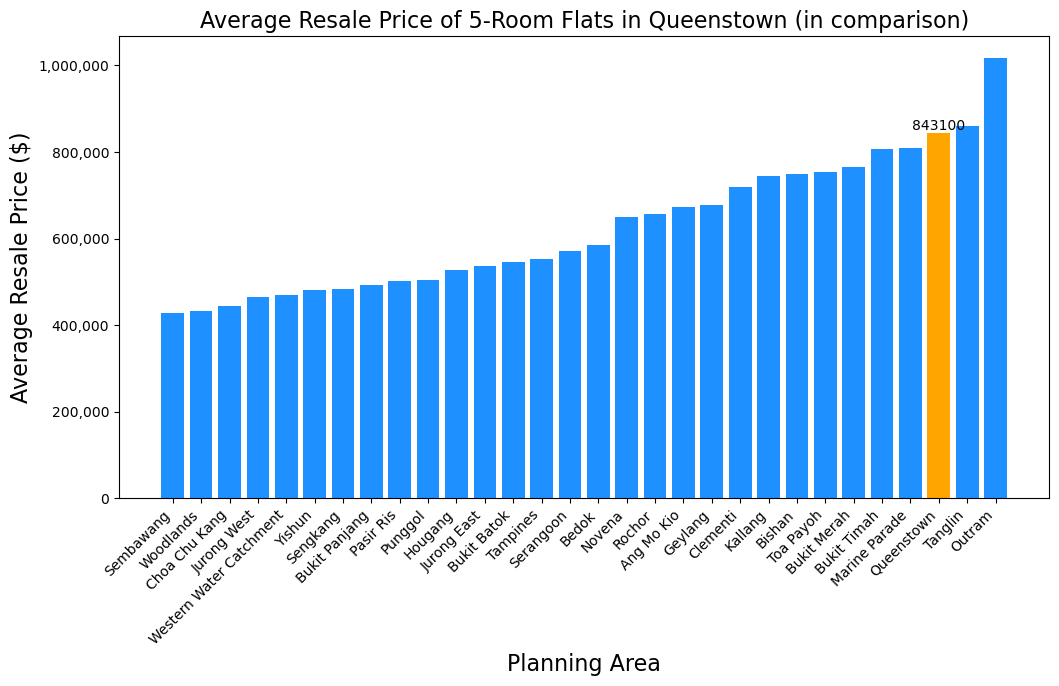

In [4]:
# Code for the barplot of Average Resale Price of 5-Room Flats in Different Planning Area
# Filter the DataFrame for 5-room flat types
five_room_df = housing_train[housing_train["flat_type"] == "5 ROOM"]
# Group the filtered DataFrame by "planning_area" and calculate the mean resale price
planning_area_resale_prices = five_room_df.groupby("planning_area")["resale_price"].mean().reset_index()
# Sort the planning areas by mean resale price
planning_area_resale_prices = planning_area_resale_prices.sort_values(by="resale_price")
# Plot bar plot for resale price of 5-room flats in different planning areas
plt.figure(figsize=(12, 6))
# Define colors for each planning area, with Queenstown in a different color
colors = np.where(planning_area_resale_prices["planning_area"] == "Queenstown", "orange", "dodgerblue")
# Plot the bar plot
bars = plt.bar(planning_area_resale_prices["planning_area"], planning_area_resale_prices["resale_price"], color=colors)
# Add the value above the label for the bar of Queenstown only
for bar, price in zip(bars, planning_area_resale_prices["resale_price"]):
    if price == planning_area_resale_prices.loc[planning_area_resale_prices["planning_area"] == "Queenstown", "resale_price"].iloc[0]:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, f"{price:.0f}", ha="center", va="bottom")
# 843,100
plt.xlabel("Planning Area", fontsize = 16)
plt.ylabel("Average Resale Price ($)", fontsize = 16)
plt.title("Average Resale Price of 5-Room Flats in Queenstown (in comparison)", fontsize = 16)
plt.xticks(rotation=45, ha="right")
tick_labels = ['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000']
plt.gca().set_yticklabels(tick_labels)
plt.show();

The average price of a 5-Room flat in Queenstown is $843,100. This is the third highest price among all the planning areas. \
However, the Tan Family reveals their budget for buying to be $680,000.

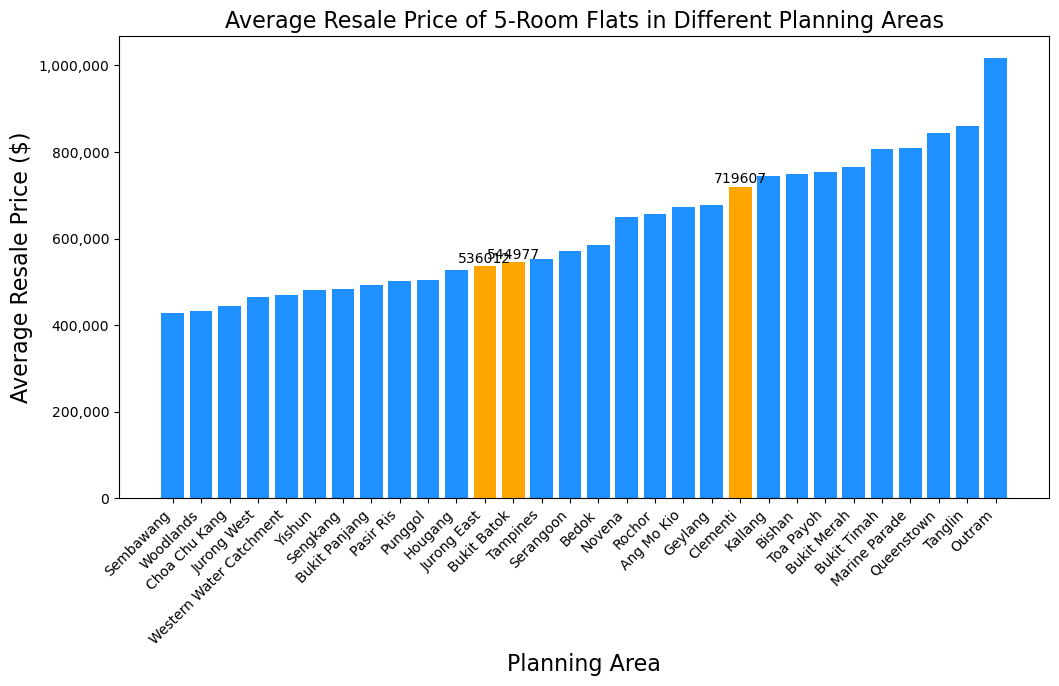

In [5]:
# Code for the barplot of Mean Resale Price of 5-Room Flats in Different Planning Area (colour for other planning area)
# Filter the DataFrame for 5-room flat types
five_room_df = housing_train[housing_train["flat_type"] == "5 ROOM"]
# Group the filtered DataFrame by "planning_area" and calculate the mean resale price
planning_area_resale_prices = five_room_df.groupby("planning_area")["resale_price"].mean().reset_index()
# Sort the planning areas by mean resale price
planning_area_resale_prices = planning_area_resale_prices.sort_values(by="resale_price")
# Plot bar plot for resale price of 5-room flats in different planning areas
plt.figure(figsize=(12, 6))
# Define colors for each planning area
colors = np.where(planning_area_resale_prices["planning_area"].isin(["Clementi", "Bukit Batok", "Jurong East"]), "orange", "dodgerblue")
# Plot the bar plot
bars = plt.bar(planning_area_resale_prices["planning_area"], planning_area_resale_prices["resale_price"], color=colors)
# Add the value above the label for the bars of Bukit Timah, Bukit Merah, Bukit Batok, and Clementi
for bar, price, area in zip(bars, planning_area_resale_prices["resale_price"], planning_area_resale_prices["planning_area"]):
    if area in ["Bukit Batok", "Clementi", "Jurong East"]:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, f"{price:.0f}", ha="center", va="bottom")
# Bukit Batok: 544,977, Clementi: 719,607, Bukit Merah: 766,499, Bukit Timah: 807,793
plt.xlabel("Planning Area", fontsize = 16)
plt.ylabel("Average Resale Price ($)", fontsize = 16)
plt.title("Average Resale Price of 5-Room Flats in Different Planning Areas", fontsize = 16)
plt.xticks(rotation=45, ha="right")
tick_labels = ['0', '200,000', '400,000', '600,000', '800,000', '1,000,000', '1,200,000']
plt.gca().set_yticklabels(tick_labels)
plt.show()

We recommend the Tan family to consider other planning areas closer to the West. \
The average resaleprice of a 5-Room flat in Jurong East is $536,012. \
The average resale price of a 5-Room flat in Bukit Batok is $544,977. \
The average resale price of a 5-Room flat in Clementi is $719,607.

However, the Tan family insists on enrolling their child into Fairfield Methodist Primary School because the parents are alumnis of that school.

### 5.3 Buying 4-Room flat in Queenstown

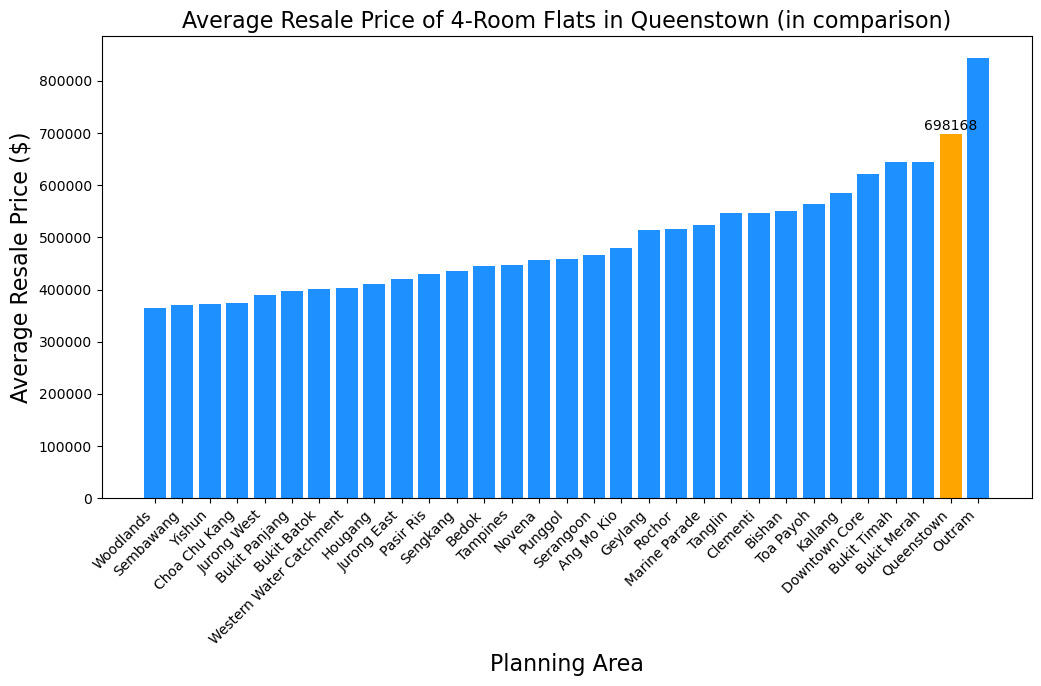

In [6]:
# Code for the barplot of mean Resale Price of 4-Room Flats in Different Planning Area
# Filter the DataFrame for 4-room flat types
four_room_df = housing_train[housing_train["flat_type"] == "4 ROOM"]
# Group the filtered DataFrame by "planning_area" and calculate the mean resale price
planning_area_resale_prices = four_room_df.groupby("planning_area")["resale_price"].mean().reset_index()
# Sort the planning areas by mean resale price
planning_area_resale_prices = planning_area_resale_prices.sort_values(by="resale_price")
# Plot bar plot for resale price of 4-room flats in different planning areas
plt.figure(figsize=(12, 6))
# Define colors for each planning area, with Queenstown in a different color
colors = np.where(planning_area_resale_prices["planning_area"] == "Queenstown", "orange", "dodgerblue")
# Plot the bar plot
bars = plt.bar(planning_area_resale_prices["planning_area"], planning_area_resale_prices["resale_price"], color=colors)
# Add the value above the label for the bar of Queenstown only
for bar, price in zip(bars, planning_area_resale_prices["resale_price"]):
    if price == planning_area_resale_prices.loc[planning_area_resale_prices["planning_area"] == "Queenstown", "resale_price"].iloc[0]:
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, f"{price:.0f}", ha="center", va="bottom")
# 698,168
plt.xlabel("Planning Area", fontsize = 16)
plt.ylabel("Average Resale Price ($)", fontsize = 16)
plt.title("Average Resale Price of 4-Room Flats in Queenstown (in comparison)", fontsize = 16)
plt.xticks(rotation=45, ha="right")
plt.show()

The average price of a 4-Room flat in Queenstown is $698,168. \
This value is slightly higher than the Tan family's budget of $680,000.

### 6.4 Nearest Distance to School and MRT Station

We found a 4-Room flat at this address: Block 21 Dover Crescent. \
The block is a 13 min walk away (950m) from Fairfield Methodist Primary School. \
The block is also a 12 min walk away (900m) from Buona Vista MRT Station.

We found a unit listing on Propertee Guru app in Block 23 Dover Crescent. Block 23 is right beside Block 21.

<img src="../images/proguruapp_queenstown_4room.PNG" style="float: left; height: 500px">

Inputting the attributes of the said unit into our new app, the predicted price is $489,423. (see image below) \
This value is much smaller than the average price of a 4-Room flat in Queenstown. \
It is also smaller than the value of the listing on current app, ie. $512,000. (see above image)

<img src="../images/queenstown_4room.JPG" style="float: left; height: 500px">

## 7. Conclusion & Recommendations

We recommend the Tan family to buy 4 room flat in Queenstown at around S$ 500,000. With the application, we can get more accurate market price instead of viewing the average price. This application can help sellers determine suitable selling price. Setting it too high might take a longer time to sell the unit. Setting it too low does not help the seller to earn profits. Additionally, it can help buyers minimise cost. This is so that buyers can avoid Cash on Valuation.

Data features that we would have liked to have collected to determine even more accurate HDB resale flat prices:
- Areas demarcated by MRT station names
- Distance to fitness areas
- Distance to parks
- Spike in prices from 2022